In [1]:
from bioservices.kegg import KEGG
import pandas as pd
import os
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import re
from openpyxl import load_workbook
import numpy as np
import xlsxwriter

In [2]:
#Sets the path
path = 'C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq'
#C:\Users\Alyssa\OneDrive\Wash U\Research\2022 Spring\RNA seq\Yarli1 expression
os.chdir(path)

k = KEGG()
k.organism = 'yli'

fullDF = pd.ExcelFile('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/FPKM counts.xlsx').parse('fpkm DEG anno')
#fpkm columns 0-15; DEG columns 16-22; annotations columns 23-26. columns 0,16,23 are geneID

fullDF.index = fullDF['geneID']

In [3]:
fpkmDF = fullDF.drop(fullDF.columns[[0,16,17,18,19,20,21,22,23]], axis=1) #fpkm columns 0 to 15
fpkmavgstd = fullDF.drop(fullDF.columns[[0,1,2,3,4,5,6,7,8,9,16,17,18,19,20,21,22,23]], axis=1)
fpkmavg = fullDF.drop(fullDF.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,22,23]], axis=1)
fpkmavgstd_pval = fullDF.drop(fullDF.columns[[0,1,2,3,4,5,6,7,8,9,16,17,19,21,23]], axis=1)
fpkmavg_pval = fullDF.drop(fullDF.columns[[0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,19,21,23]], axis=1)
DEGDF = fullDF.drop(fullDF.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,23]], axis=1) #DEG columns 16 to 22

fpkm = fpkmavgstd_pval
fpkm

,glucose average,glycerol average,oleic acid average,gluc_std,glyc_std,oa_std,glucVglyc padj,glucVoa padj,glycVoa padj,kegg anno,uniprot anno,EC
geneID,,,,,,,,,,,,
YALI0A00110g,3.583333,1.976667,9.253333,1.161048,1.415392,3.550469,4.100000e-02,4.400000e-04,1.200000e-08,NaN,oligopeptide transmembrane transporter activity,NaN
YALI0A00132g,1808.253333,1181.526667,949.926667,111.761887,57.707920,97.770370,2.800000e-09,7.400000e-12,4.900000e-01,heat shock 70kDa protein 1/2/6/8,ATP binding,NaN
YALI0A00154g,27.490000,178.630000,1993.160000,4.939929,38.858981,145.898420,3.200000e-45,5.100000e-274,6.300000e-106,NaN,NaN,NaN
YALI0A00176g,3.556667,2.300000,3.633333,0.363501,0.689420,1.047394,2.000000e-02,7.500000e-01,6.500000e-03,NaN,NaN,NaN
YALI0A00198g,0.056667,0.596667,1.370000,0.098150,0.650410,0.495177,8.800000e-02,6.600000e-03,2.400000e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
YALI0F32043g,18.450000,13.240000,11.170000,1.903129,1.126943,1.065880,4.700000e-05,1.600000e-05,8.800000e-01,GTPase-activating protein BEM2,GTPase activator activity,NaN
YALI0F32065g,204.960000,250.123333,336.003333,60.566496,38.526448,41.778514,4.600000e-01,4.400000e-05,1.700000e-03,NaN,NaN,NaN
YALI0F32131g,0.306667,0.423333,0.973333,0.306159,0.189297,0.376342,8.300000e-01,7.200000e-02,1.300000e-01,NaN,triglyceride lipase activity,NaN


# Functions for FPKM

In [4]:
def parseKeggBiochemPathways(pathways,pathway_dict,DEG_dataCopy,resetKeggCode=True):   
    if resetKeggCode==True:
        fpkm['KEGG_pathway'] = '0'   
    #biochem is the biochemical pathway (i.e., glycolysis)
    for biochem in pathways:
        data = k.get(biochem)
        dict_data = k.parse(data)
        for gene in dict_data['GENE']:
            if (gene in DEG_dataCopy.index):
                DEG_dataCopy.loc[gene,'KEGG_geneAbbreviation'] = dict_data['GENE'][gene].split('; ')[0]
                if (DEG_dataCopy.loc[gene,'KEGG_pathway'] =='0'):
                    DEG_dataCopy.loc[gene,'KEGG_pathway'] = pathway_dict[biochem]
                else:
                    DEG_dataCopy.loc[gene,'KEGG_pathway'] = DEG_dataCopy.loc[gene,'KEGG_pathway']+';'+pathway_dict[biochem]
            else:
                print('Kegg gene {} not found in RNA Seq data'.format(gene))
    return(DEG_dataCopy)

def colorPlotting(df,xTICKS,transpose=False):
    xTICKtemp = []
    for item in xTICKS:
        try:
            xTICKtemp.append(item.split('[')[0])
        except Exception as e:
            xTICKtemp.append(item)
    fig, ax = plt.subplots()
    if transpose==False:        
        plt.imshow(df.T, cmap = 'bwr') 
        plt.clim(-4,4)
        plt.colorbar(orientation="horizontal")  
        plt.yticks(range(len(df.columns)), df.columns) 
        plt.xticks(range(len(df)), xTICKtemp) 
        fig = plt.gcf()
        fig.set_size_inches(17,3) 
        ax.xaxis.tick_top()
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
        plt.show() 
    else:
        plt.imshow(df, cmap = 'bwr') 
        plt.clim(-4,4)
        plt.colorbar() 
        plt.xticks(range(len(df.columns)), df.columns) 
        plt.yticks(range(len(df)), xTICKtemp) 
        fig = plt.gcf()
        fig.set_size_inches(3,17) 
        ax.xaxis.tick_top()
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
        plt.show() 
        
fpkm['KEGG_geneAbbreviation'] = '0'
fpkm['KEGG_pathway'] = '0'

def df_sorter(df,dropOption=0):    
    df = df[df.KEGG_pathway!='0'].copy()
    df.sort_values(by=['KEGG_pathway'],inplace=True)
  #  df.rename(columns={'DEG Log2 Ratio (0h;327vs219)':'327vs219(0h)','DEG Log2 Ratio (12h;327vs219)':'327vs219(12h)','DEG Log2 Ratio (327;12hvs0h)': '327(12vs0h)',
            #       'DEG Log2 Ratio (327;24hvs0h)':'327(24vs0h)'},inplace=True)   
    df2 = df.copy() #fpkm averages, kegg anno, KEGG_pathway, EC
    df3 = df.copy() #fpkm averages, stdevs, DEG padjs, kegg anno, KEGG_pathway
    if dropOption==0:
        df2.drop(columns = ['gluc_std','glyc_std','oa_std','glucVglyc padj','glucVoa padj', 'glycVoa padj','KEGG_geneAbbreviation',
                            'uniprot anno'],
                 inplace=True)
        df3.drop(columns = ['KEGG_geneAbbreviation','uniprot anno'],inplace=True)
    elif dropOption==1:
        df2.drop(columns = ['gluc_std','glyc_std','oa_std','glucVglyc padj','glucVoa padj', 'glycVoa padj','KEGG_geneAbbreviation',
                            'uniprot anno','EC'],inplace=True)
    else:
        df2.drop(columns = ['gluc_std','glyc_std','oa_std','glucVglyc padj','glucVoa padj', 'glycVoa padj','KEGG_geneAbbreviation',
                            'uniprot anno','EC'],inplace=True)
    return df2,df3,df.index

# Lists of KEGG pathways for plotting

In [5]:
## pathway lists
central_carbon = ['yli00010','yli00020','yli00030','yli00620','yli00630']
central_carbon_anno = ['Glycolysis/Gluconeogenesis','TCA cycle','Pentose phosphate pathway',
                       'Pyruvate metabolism','Glyoxylate and dicarboxylate metabolism']
CC_reduced = ['yli00010','yli00020','yli00030','yli00630']
CC_reduced_anno = ['Glycolysis/Gluconeogenesis','TCA cycle','Pentose phosphate pathway','Glyoxylate']
lipid_deg = ['yli00071','yli00561','yli00564']
lipid_deg_anno = ['Fatty acid degradation','Glycerolipid metabolism','Glycerophospholipid metabolism']
FA_deg = ['yli00071']
FA_deg_anno = ['Fatty acid degradation']
ox_phos = ['yli00190']
ox_phos_anno = ['Oxidative phosphorylation']
terpene = ['yli00900','yli00909']
terpene_anno = ['Terpenoid backbone biosynthesis','Sesquiterpenoid and triterpenoid biosynthesis']
cell=['yli04111','yli04113']
cell_anno=['Cell cycle','Meiosis']
cofactors=['yli00730','yli00740','yli00750','yli00760','yli00770','yli00780','yli00790','yli00670','yli00860','yli00130']
cofactors_anno=['Th','Ri','Vi','Ni','Pa','Bi','Li','Fo','On','Po','Ub']
coa=['yli00770','yli00410']
coa_anno=['Pantothenate','beta-alanine']

# Adding KEGG pathways to FPKM data

In [6]:
#pathways to initially parse
pathway = CC_reduced
anno = CC_reduced_anno

pathwaysToExplore = pathway
annotation = anno
name = annotation[0]
pathwayDict = dict(zip(pathwaysToExplore,annotation)) #pathway to kegg name

dfx = parseKeggBiochemPathways(pathwaysToExplore,pathwayDict,fpkm)
df2,df3,df = df_sorter(dfx)
pathwayDF=df2
pathwayDF=pathwayDF.sort_values(by=['KEGG_pathway','glucose average'], ascending=[True,False]) #sort DF based on glucose FPKM, largest to smallest
#pathwayDF.to_csv('CC with glyoxylate.csv')
pathwayDF

,glucose average,glycerol average,oleic acid average,kegg anno,EC,KEGG_pathway
geneID,,,,,,
YALI0C06369g,6172.923333,5300.683333,2914.353333,glyceraldehyde 3-phosphate dehydrogenase (phos...,1.2.1.12,Glycolysis/Gluconeogenesis
YALI0F16819g,1629.336667,1501.220000,1131.230000,enolase,4.2.1.11,Glycolysis/Gluconeogenesis
YALI0F05214g,1215.103333,1340.603333,1256.730000,triosephosphate isomerase (TIM),5.3.1.1,Glycolysis/Gluconeogenesis
YALI0F09185g,801.190000,714.073333,327.656667,pyruvate kinase,2.7.1.40,Glycolysis/Gluconeogenesis
YALI0B02728g,605.650000,758.170000,879.096667,"2,3-bisphosphoglycerate-dependent phosphoglyce...",5.4.2.11,Glycolysis/Gluconeogenesis
...,...,...,...,...,...,...
YALI0D16753g,988.440000,1195.536667,2194.323333,malate dehydrogenase,1.1.1.37,TCA cycle;Glyoxylate
YALI0E14190g,891.210000,849.980000,1049.813333,malate dehydrogenase,1.1.1.37,TCA cycle;Glyoxylate
YALI0D09361g,810.086667,514.120000,893.376667,aconitate hydratase,4.2.1.3,TCA cycle;Glyoxylate


# Generating FPKM heatmaps

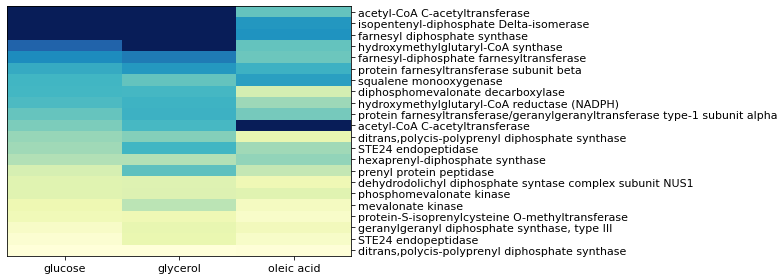

In [239]:
plot_array = pathwayDF[["glucose average","glycerol average","oleic acid average"]].to_numpy()
kegg_anno = pathwayDF['kegg anno'].tolist()
sources = ['glucose','glycerol','oleic acid']

fig, ax = plt.subplots()
#im = ax.imshow(plot_array) #'cmap = " " ' argument sets color palette
plt.imshow(plot_array, cmap="YlGnBu", vmin=0, vmax=250) # , vmin=0, vmax=1500

# axis labels with ticks
ax.set_xticks(np.arange(len(sources)), labels=sources, fontname="sans-serif", fontsize=11)
ax.set_yticks(np.arange(len(kegg_anno)), labels=kegg_anno, fontname="sans-serif", fontsize=11)
ax.yaxis.tick_right()

#plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") #rotate sources

fig.set_size_inches(11,4)
ax.set_aspect('auto') #stretches boxes to match fig size
plt.tight_layout()
plt.savefig('terpene FPKMs2.png',dpi=1200)
#plt.show()

# load reduced central carbon genes from excel

In [7]:
CC_reduced = pd.ExcelFile('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/central carbon reduced.xlsx').parse('reduced')
# summed all EC values to represent one kegg function

# Create lists and arrays from DF columns
# Plot and save central carbon heatmap

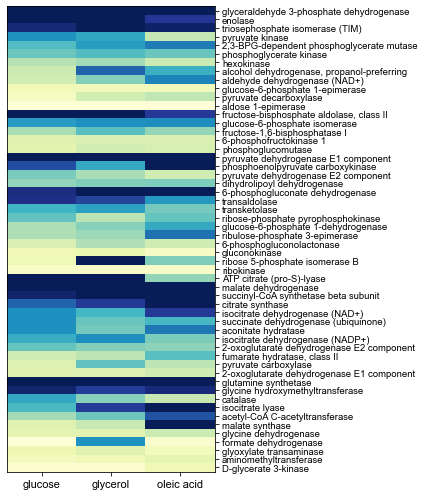

In [572]:
plot_array = CC_reduced[["glucose average","glycerol average","oleic acid average"]].to_numpy()
kegg_anno = CC_reduced['kegg anno'].tolist()
sources = ['glucose','glycerol','oleic acid']

fig, ax = plt.subplots()
#im = ax.imshow(plot_array) #'cmap = " " ' argument sets color palette
plt.imshow(plot_array, cmap="YlGnBu", vmin=0, vmax=1300)

# axis labels with ticks
ax.set_xticks(np.arange(len(sources)), labels=sources, fontname="Arial", fontsize=11)
ax.set_yticks(np.arange(len(kegg_anno)), labels=kegg_anno, fontname="Arial", fontsize=9.5)
ax.yaxis.tick_right()

#plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") #rotate sources
#plt.colorbar(ax=[ax],location='left',pad=0.05)

fig.set_size_inches(6,7)
ax.set_aspect('auto') #stretches boxes to match fig size
plt.tight_layout()
plt.savefig('CC fpkm arial 6x7.png',dpi=1200)
#plt.show()

## colorbar for FPKM plots

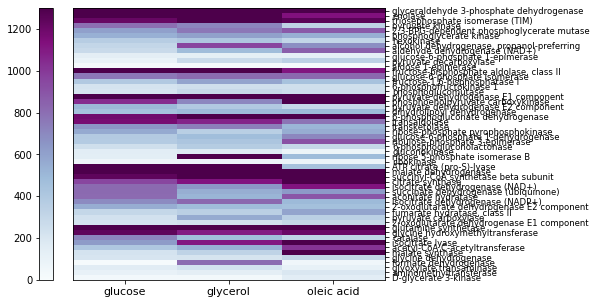

In [606]:
plot_array = CC_reduced[["glucose average","glycerol average","oleic acid average"]].to_numpy()
kegg_anno = CC_reduced['kegg anno'].tolist()
sources = ['glucose','glycerol','oleic acid']
fig, ax = plt.subplots()
#im = ax.imshow(plot_array) #'cmap = " " ' argument sets color palette
plt.imshow(plot_array, cmap="BuPu", vmin=0, vmax=1300)
# axis labels with ticks
ax.set_xticks(np.arange(len(sources)), labels=sources, fontname="sans-serif", fontsize=11)
ax.set_yticks(np.arange(len(kegg_anno)), labels=kegg_anno, fontname="sans-serif", fontsize=8.5)
ax.yaxis.tick_right()
#plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") #rotate sources
plt.colorbar(ax=[ax],location='left',pad=0.05)
fig.set_size_inches(7,5)
ax.set_aspect('auto') #stretches boxes to match fig size
#plt.tight_layout()
#plt.savefig('CC fpkm color bar.png',dpi=1200)
#plt.show()

# Save FPKM pathway dataframes to excel

In [688]:
#pathways to initially parse
pathway = genetic
anno = genetic_anno

pathwaysToExplore = pathway
annotation = anno
name = annotation[0]
pathwayDict = dict(zip(pathwaysToExplore,annotation)) #pathway to kegg name

dfx = parseKeggBiochemPathways(pathwaysToExplore,pathwayDict,fpkm)
df2,df3,df = df_sorter(dfx)
pathwayDF=df2
pathwayDF=pathwayDF.sort_values(by=['KEGG_pathway','glucose average'], ascending=[True,False]) #sort DF based on glucose FPKM, largest to smallest
#pathwayDF.to_csv('CC with glyoxylate.csv')
pathwayDF

book = load_workbook('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/pathways FPKM.xlsx')
with pd.ExcelWriter('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/pathways FPKM.xlsx', engine='openpyxl') as writer:
    writer.book = book 
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)    
 
    pathwayDF.to_excel(writer, name) ## Your dataframe to append.  
    writer.save()

# Functions for DEG data

In [8]:
def parseKeggBiochemPathwaysDEG(pathways,pathway_dict,DEG_dataCopy,resetKeggCode=True):   
    if resetKeggCode==True:
        DEGDF['KEGG_pathway'] = '0'   
    #biochem is the biochemical pathway (i.e., glycolysis)
    for biochem in pathways:
        data = k.get(biochem)
        dict_data = k.parse(data)
        for gene in dict_data['GENE']:
            if (gene in DEG_dataCopy.index):
                DEG_dataCopy.loc[gene,'KEGG_geneAbbreviation'] = dict_data['GENE'][gene].split('; ')[0]
                if (DEG_dataCopy.loc[gene,'KEGG_pathway'] =='0'):
                    DEG_dataCopy.loc[gene,'KEGG_pathway'] = pathway_dict[biochem]
                else:
                    DEG_dataCopy.loc[gene,'KEGG_pathway'] = DEG_dataCopy.loc[gene,'KEGG_pathway']+';'+pathway_dict[biochem]
            else:
                print('Kegg gene {} not found in RNA Seq data'.format(gene))
    return(DEG_dataCopy)
     
DEGDF['KEGG_geneAbbreviation'] = '0'
DEGDF['KEGG_pathway'] = '0'

def df_sorterDEG(dfDEG,dropOption=0):    
    dfDEG = dfDEG[dfDEG.KEGG_pathway!='0'].copy()
    dfDEG.sort_values(by=['KEGG_pathway'],inplace=True)
  #  df.rename(columns={'DEG Log2 Ratio (0h;327vs219)':'327vs219(0h)','DEG Log2 Ratio (12h;327vs219)':'327vs219(12h)','DEG Log2 Ratio (327;12hvs0h)': '327(12vs0h)',
            #       'DEG Log2 Ratio (327;24hvs0h)':'327(24vs0h)'},inplace=True)   
    df2DEG = dfDEG.copy() #DEGs, padjs, kegg anno, KEGG_pathway, EC
    df3DEG = dfDEG.copy() #DEGs, padjs, kegg anno, KEGG_pathway
    if dropOption==0:
        df2DEG.drop(columns = ['KEGG_geneAbbreviation','uniprot anno'],inplace=True)
        df3DEG.drop(columns = ['KEGG_geneAbbreviation','uniprot anno'],inplace=True)
    elif dropOption==1:
        df2DEG.drop(columns = ['KEGG_geneAbbreviation','uniprot anno'],inplace=True)
    else:
        df2DEG.drop(columns = ['KEGG_geneAbbreviation','uniprot anno'],inplace=True)
    return df2DEG,df3DEG,dfDEG.index

# Create DEG pathway dataframe and sort based on column values

In [9]:
pathwayDEG = coa #pathways to parse
annoDEG = coa_anno

pathwaysToExploreDEG = pathwayDEG
annotationDEG = annoDEG
name = annotationDEG[0]
pathwayDictDEG = dict(zip(pathwaysToExploreDEG,annotationDEG)) #pathway to kegg name

dfxDEG = parseKeggBiochemPathwaysDEG(pathwaysToExploreDEG,pathwayDictDEG,DEGDF)
df2DEG,df3DEG,dfDEG = df_sorterDEG(dfxDEG)
pathDEGDF=df2DEG
pathDEGDF=pathDEGDF.sort_values(by=['glucVglyc log2FC'], ascending=[False]) #sort DF based on glucose FPKM, largest to smallest
#pathDEGDF.to_csv('terpenoid DEG.csv')
pathDEGDF

,glucVglyc log2FC,glucVglyc padj,glucVoa log2FC,glucVoa padj,glycVoa log2FC,glycVoa padj,kegg anno,EC,KEGG_pathway
geneID,,,,,,,,,
YALI0E06413g,1.100,7.200000e-15,0.190,2.200000e-01,-0.950,1.300000e-10,phosphopantothenoylcysteine decarboxylase,4.1.1.36,Pantothenate
YALI0C00253g,0.720,6.100000e-05,0.260,1.600000e-01,-0.460,1.300000e-02,acetolactate synthase I/II/III large subunit,2.2.1.6,Pantothenate
YALI0C23408g,0.710,2.300000e-08,1.300,6.600000e-26,0.590,4.100000e-06,dihydroxy-acid dehydratase,4.2.1.9,Pantothenate
YALI0F19910g,0.630,2.600000e-05,-0.100,5.300000e-01,-0.730,6.000000e-07,branched-chain amino acid aminotransferase,2.6.1.42,Pantothenate
YALI0B06006g,0.580,9.300000e-06,-0.730,2.600000e-09,-1.300,1.700000e-26,pantoate--beta-alanine ligase,6.3.2.1,Pantothenate;beta-alanine
YALI0A17875g,0.520,2.200000e-02,0.390,7.900000e-02,-0.130,6.200000e-01,aldehyde dehydrogenase (NAD+),1.2.1.3,Pantothenate;beta-alanine
YALI0E09306g,0.470,1.700000e-05,0.520,1.800000e-06,0.048,7.200000e-01,4'-phosphopantetheinyl transferase,2.7.8.-,Pantothenate
YALI0D03135g,0.380,6.000000e-02,0.430,2.800000e-02,0.048,8.400000e-01,ketol-acid reductoisomerase,1.1.1.86,Pantothenate
YALI0B16082g,0.120,6.200000e-01,0.350,1.100000e-01,0.230,3.300000e-01,holo-[acyl-carrier protein] synthase,NaN,Pantothenate


## load reduced central carbon genes from excel

In [643]:
#terp_DEG=pd.read_csv('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/terpenoid DEG.csv')
#terp_DEG

# Generating DEG heatmaps

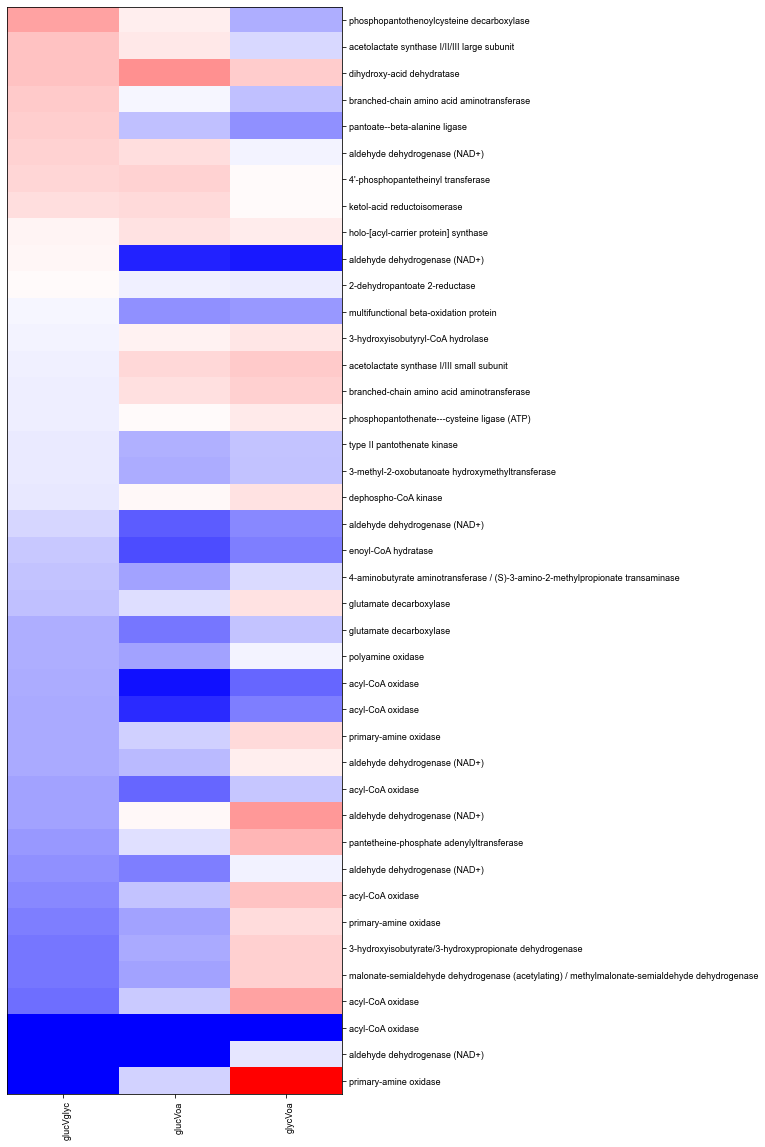

In [656]:
#pathDEGDF=terp_DEG
plot_arrayDEG = pathDEGDF[["glucVglyc log2FC","glucVoa log2FC","glycVoa log2FC"]].to_numpy()
pval_arrayDEG = pathDEGDF[["glucVglyc padj","glucVoa padj","glycVoa padj"]].to_numpy()
#astx_arrayDEG = pathDEGDF[["glucVglyc (*)","glucVoa (*)","glycVoa (*)"]].to_numpy()
kegg_annoDEG = pathDEGDF['kegg anno'].tolist()
sourcesDEG = ['glucVglyc','glucVoa','glycVoa']

fig, ax = plt.subplots()
plt.imshow(plot_arrayDEG, cmap="bwr", vmin=-3, vmax=3) # , vmin=0, vmax=1500

# axis labels with ticks
ax.set_xticks(np.arange(len(sourcesDEG)), labels=sourcesDEG, fontname="Arial", fontsize=9)
ax.set_yticks(np.arange(len(kegg_annoDEG)), labels=kegg_annoDEG, fontname="Arial", fontsize=9)
ax.yaxis.tick_right()

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") #rotate sources
#plt.colorbar(ax=[ax],location='left',pad=0.1)

#for i in range(len(kegg_annoDEG)):
#    for j in range(len(sourcesDEG)):
#        text = ax.text(j, i, astx_arrayDEG[i, j], ha="center", va="center_baseline", color="k", fontsize=13)

fig.set_size_inches(6,20)
ax.set_aspect('auto') #stretches boxes to match fig size
#plt.tight_layout()
#plt.savefig('cell cycle DEGs.png',dpi=1200)

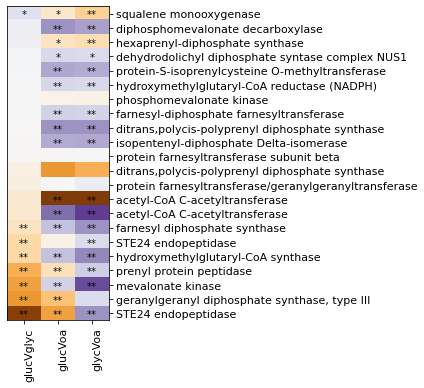

In [628]:
fig, ax = plt.subplots()
plt.imshow(plot_arrayDEG, cmap="PuOr", vmin=-2.3, vmax=2.3) # , vmin=0, vmax=1500

ax.set_xticks(np.arange(len(sourcesDEG)), labels=sourcesDEG, fontname="sans-serif", fontsize=11)
ax.set_yticks(np.arange(len(kegg_annoDEG)), labels=kegg_annoDEG, fontname="sans-serif", fontsize=11)
ax.yaxis.tick_right()

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") #rotate sources
#plt.colorbar(ax=[ax],location='left',pad=0.1)

for i in range(len(kegg_annoDEG)): ##puts asterisks on plot based on p-value
    for j in range(len(sourcesDEG)):
        text = ax.text(j, i, astx_arrayDEG[i, j], ha="center", va="center_baseline", color="k", fontsize=10)

fig.set_size_inches(6,5.5)
ax.set_aspect('auto') #stretches boxes to match fig size
plt.tight_layout()
#plt.savefig('terp DEGs PuOr.png',dpi=1200)

# Adding -log10(pvalue) column to DEGDF

In [362]:
DEGDF.to_csv('DEGDF.csv')

In [11]:
DEGDF_ax_10p = pd.read_csv('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/DEGDF_astx_log10p.csv')

In [12]:
DEGDF_ax_10p=DEGDF_ax_10p.sort_values(by=['glucVglyc log2FC'], ascending=[False])
DEGDF_ax_10p

,geneID,glucVglyc log2FC,glucVglyc padj,glucVglyc (*),glucVglyc -log10pval,glucVoa log2FC,glucVoa padj,glucVoa (*),glucVoa -log10pval,glycVoa log2FC,glycVoa padj,glycVoa (*),glycVoa -log10pval,kegg anno,uniprot anno,EC,KEGG_geneAbbreviation,KEGG_pathway
0,YALI0B09361g,3.5,3.300000e-136,**,135.481486,7.30,8.400000e-296,**,295.075721,3.80,6.100000e-117,**,116.214670,NaN,triglyceride lipase activity,NaN,0,0
3238,YALI0E08085g,2.5,2.100000e-50,**,49.677781,-0.47,5.800000e-03,*,2.236572,-3.00,1.200000e-71,**,70.920819,NaN,NaN,NaN,0,0
993,YALI0D17292g,2.4,8.400000e-10,**,9.075721,4.00,6.100000e-12,**,11.214670,1.60,4.200000e-03,**,2.376751,NaN,NaN,NaN,0,0
2053,YALI0F21857g,2.3,3.500000e-05,**,4.455932,2.60,1.200000e-05,**,4.920819,0.30,6.200000e-01,,0.207608,"mannan endo-1,6-alpha-mannosidase","mannan endo-1,6-alpha-mannosidase activity",3.2.1.101,0,0
3269,YALI0F18238g,2.1,1.400000e-22,**,21.853872,0.56,6.300000e-03,*,2.200659,-1.50,2.600000e-12,**,11.585027,ATP-dependent RNA helicase DDX55/SPB4,ATP binding,3.6.4.13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,YALI0C04730g,-6.0,7.100000e-47,**,46.148742,-3.60,3.900000e-18,**,17.408935,2.40,1.600000e-09,**,8.795880,NaN,carbohydrate:proton symporter activity,NaN,0,0
213,YALI0E32901g,-6.6,1.000000e-51,**,51.000000,-5.80,9.100000e-42,**,41.040959,0.79,2.100000e-07,**,6.677781,"MFS transporter, SHS family, lactate transporter",secondary active monocarboxylate transmembrane...,NaN,0,0
402,YALI0F01628g,-6.9,1.700000e-45,**,44.769551,-5.10,9.800000e-27,**,26.008774,1.80,3.100000e-04,**,3.508638,ribose 5-phosphate isomerase B,isomerase activity,5.3.1.6,0,0
64,YALI0F01606g,-8.9,4.400000e-215,**,214.356547,-5.70,1.100000e-90,**,89.958607,3.20,1.400000e-80,**,79.853872,NaN,ATP binding,NaN,0,0


# Scatter plot from lists

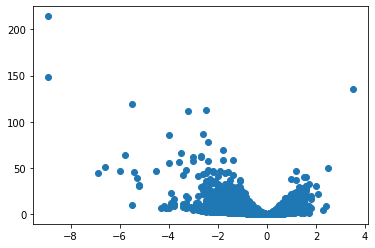

In [13]:
DEG=DEGDF_ax_10p
glucVglyc_2FC = DEG['glucVglyc log2FC'].tolist()
glucVglyc_10p = DEG['glucVglyc -log10pval'].tolist()

plt.scatter(glucVglyc_2FC, glucVglyc_10p)
plt.show()

## lists from updated DEFDF_asx_10p to plot

In [14]:
glucVglyc_2FC = DEG['glucVglyc log2FC'].tolist()
glucVglyc_10p = DEG['glucVglyc -log10pval'].tolist()

glucVoa_2FC = DEG['glucVoa log2FC'].tolist()
glucVoa_10p = DEG['glucVoa -log10pval'].tolist()

glycVoa_2FC = DEG['glycVoa log2FC'].tolist()
glycVoa_10p = DEG['glycVoa -log10pval'].tolist()

# Make volcano plot

In [94]:
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker

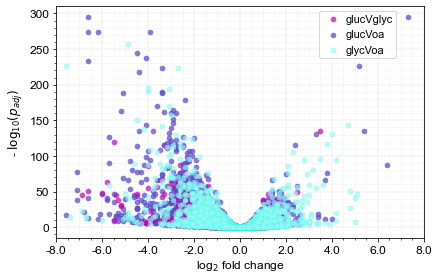

In [96]:
fig, ax = plt.subplots()

ax.grid(which='major',color='whitesmoke',zorder=-1.0,linewidth=1.8)
ax.grid(which='minor',color='whitesmoke',zorder=-1.0,linewidth=0.8)
ax.minorticks_on()

font = font_manager.FontProperties(family='Arial', style='normal', size=11)

ax.scatter(glucVglyc_2FC, glucVglyc_10p, label='glucVglyc',color='m',s=28,alpha=0.7,zorder=3, 
           edgecolors='mediumvioletred',linewidths=0.3)
ax.scatter(glucVoa_2FC, glucVoa_10p, label='glucVoa',color='#5E4FD1',s=27,alpha=0.75,zorder=2, 
           edgecolors='#4131B9',linewidths=0.3)
ax.scatter(glycVoa_2FC, glycVoa_10p, label='glycVoa',color='#97FBF4',s=27,alpha=0.65,zorder=3.1, 
           edgecolors='#31F7E9',linewidths=0.3) ##7AFAF1

ax.legend(bbox_to_anchor=[0.94,1.005],loc="upper right",borderpad=0.3, prop=font,handletextpad=0.1)

ax.set_xlim([-8.0, 8.0])
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.1f}'.format(x)))
ax.set_xlabel(r'log$_2$ fold change',fontsize=12,font='Arial')
ax.set_ylabel(r'- $\log_{10}(p_{adj})$',fontsize=12,font='Arial')
plt.xticks(fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)

fig.set_size_inches(6.2,4)
plt.tight_layout()
plt.savefig('volcano plot small3.png',dpi=1200)
#plt.show()

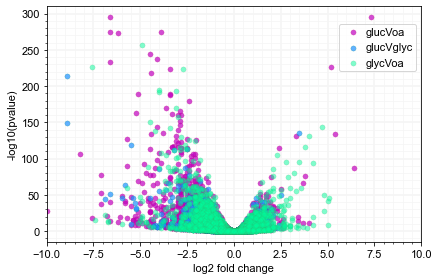

In [514]:
fig, ax = plt.subplots()

ax.grid(which='major',color='whitesmoke',zorder=-1.0,linewidth=1.8)
ax.grid(which='minor',color='whitesmoke',zorder=-1.0,linewidth=0.8)
ax.minorticks_on()

font = font_manager.FontProperties(family='Arial', style='normal', size=11)

ax.scatter(glucVoa_2FC, glucVoa_10p, label='glucVoa',color='m',s=27,alpha=0.7,zorder=2, 
           edgecolors='mediumvioletred',linewidths=0.3)
ax.scatter(glucVglyc_2FC, glucVglyc_10p, label='glucVglyc',color='dodgerblue',s=27,alpha=0.7,zorder=2, 
           edgecolors='darkcyan',linewidths=0.3)
ax.scatter(glycVoa_2FC, glycVoa_10p, label='glycVoa',color='mediumspringgreen',s=27,alpha=0.5,zorder=2, 
           edgecolors='mediumseagreen',linewidths=0.3)

ax.legend(bbox_to_anchor=[1,0.95],loc="upper right",borderpad=0.3, prop=font,handletextpad=0.1)

ax.set_xlim([-10, 10])
ax.set_xlabel('log2 fold change',fontsize=11,font='Arial')
ax.set_ylabel('-log10(pvalue)',fontsize=11,font='Arial')
plt.xticks(fontname="Arial", fontsize=11)
plt.yticks(fontname="Arial", fontsize=11)

fig.set_size_inches(6.2,4)
plt.tight_layout()
#plt.savefig('volcano plot small2.png',dpi=1200)
#plt.show()

## 5x3 volcano plot
## streamlined font size and marker size changes

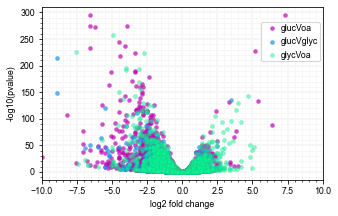

In [538]:
fig, ax = plt.subplots()
Fsize=8.8 #font size
Msize=17 #marker size
font = font_manager.FontProperties(family='Arial', style='normal', size=Fsize)
ax.grid(which='major',color='whitesmoke',zorder=-1.0,linewidth=1.8)
ax.grid(which='minor',color='whitesmoke',zorder=-1.0,linewidth=0.8)
ax.minorticks_on()
font = font_manager.FontProperties(family='Arial', style='normal', size=Fsize)
ax.scatter(glucVoa_2FC, glucVoa_10p, label='glucVoa',color='m',s=Msize,alpha=0.7,zorder=2, 
           edgecolors='mediumvioletred',linewidths=0.3)
ax.scatter(glucVglyc_2FC, glucVglyc_10p, label='glucVglyc',color='dodgerblue',s=Msize,alpha=0.7,zorder=2, 
           edgecolors='darkcyan',linewidths=0.3)
ax.scatter(glycVoa_2FC, glycVoa_10p, label='glycVoa',color='mediumspringgreen',s=Msize,alpha=0.5,zorder=2, 
           edgecolors='mediumseagreen',linewidths=0.3)
ax.legend(bbox_to_anchor=[1.005,0.94],loc="upper right",borderpad=0.2, prop=font,handletextpad=0)
ax.set_xlim([-10, 10])
ax.set_xlabel('log2 fold change',fontsize=Fsize,font='Arial')
ax.set_ylabel('-log10(pvalue)',fontsize=Fsize,font='Arial')
plt.xticks(fontname="Arial", fontsize=Fsize)
plt.yticks(fontname="Arial", fontsize=Fsize)
fig.set_size_inches(4.8,3.1)
plt.tight_layout()
plt.savefig('volcano plot 5x3.png',dpi=1200)
#plt.show()

# Save DEG pathway dataframes to excel

In [687]:
## pathway lists
central_carbon = ['yli00010','yli00020','yli00030','yli00620','yli00630']
central_carbon_anno = ['Glycolysis/Gluconeogenesis','TCA cycle','Pentose phosphate pathway',
                       'Pyruvate metabolism','Glyoxylate and dicarboxylate metabolism']
CC_reduced = ['yli00010','yli00020','yli00030','yli00630']
CC_reduced_anno = ['Glycolysis/Gluconeogenesis','TCA cycle','Pentose phosphate pathway','Glyoxylate']
lipid_deg = ['yli00071','yli00561','yli00564']
lipid_deg_anno = ['Fatty acid degradation','Glycerolipid metabolism','Glycerophospholipid metabolism']
FA_deg = ['yli00071']
FA_deg_anno = ['Fatty acid degradation']
ox_phos = ['yli00190']
ox_phos_anno = ['Oxidative phosphorylation']
terpene = ['yli00900','yli00909']
terpene_anno = ['Terpenoid backbone biosynthesis','Sesquiterpenoid and triterpenoid biosynthesis']
cell=['yli04111','yli04113']
cell_anno=['Cell cycle','Meiosis']
cofactors=['yli00730','yli00740','yli00750','yli00760','yli00780','yli00790','yli00670','yli00860','yli00130']
cofactors_anno=['Th','Ri','Vi','Ni','Bi','Li','Fo','On','Po','Ub']
coa=['yli00770','yli00410']
coa_anno=['Pantothenate','beta-alanine']
oxstress=['yli00053','yli00130','yli00480',]
oxstress_anno=['ascorbate','ubiquinone','glutathione']
genetic=['yli03020','yli03022','yli03030','yli03410','yli03420','yli03430','yli03440']
genetic_anno=['RNA poly','transcrip factors','DNA rep','base repair','nucleotide repair','mismatch repair','homo recomb']

In [689]:
pathwayDEG = cofactors #pathways to parse
annoDEG = cofactors_anno

pathwaysToExploreDEG = pathwayDEG
annotationDEG = annoDEG
name = annotationDEG[0]
pathwayDictDEG = dict(zip(pathwaysToExploreDEG,annotationDEG)) #pathway to kegg name

dfxDEG = parseKeggBiochemPathwaysDEG(pathwaysToExploreDEG,pathwayDictDEG,DEGDF)
df2DEG,df3DEG,dfDEG = df_sorterDEG(dfxDEG)
pathDEGDF=df2DEG
pathDEGDF=pathDEGDF.sort_values(by=['glucVglyc log2FC'], ascending=[False]) #sort DF based on glucose FPKM, largest to smallest
#pathDEGDF

book = load_workbook('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/pathways DEG.xlsx')
with pd.ExcelWriter('C:/Users/Alyssa/OneDrive/Wash U/Research/MFA/RNA seq/pathways DEG.xlsx', engine='openpyxl') as writer:
    writer.book = book 
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)    
 
    pathDEGDF.to_excel(writer, name) ## Your dataframe to append.  
    writer.save()

Kegg gene YALI0E35222g not found in RNA Seq data
Kegg gene YALI0E35222g not found in RNA Seq data
